In [67]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [68]:
list_files = glob.glob('/mnt/Data/Data/IMERG/raw_half_hour/*.nc')
list_files = sorted(list_files)
len_files = len(list_files)
print(f'Length of list_files: {len_files}')

Length of list_files: 384


In [69]:
start_time = list_files[0].split('/')[-1].split('.')[1].split('-')[0]
end_time = list_files[-1].split('/')[-1].split('.')[1].split('-')[0]

year = start_time[:4]
month = start_time[4:6]
day_s = start_time[6:8]
day_e = end_time[6:8]

print(f'Start time: {year}-{month}-{day_s}')
print(f'End time  : {year}-{month}-{day_e}')

Start time: 2021-01-01
End time  : 2021-01-08


In [70]:
# precipitationCal unit is mm/hr

salida = None

for t in range(len_files):

    data = ca.read_netcdf(list_files[t],0)
    pre_tmp = data['precipitationCal'][0,:,:].data.T
    pre_tmp[pre_tmp == np.min(pre_tmp)] = 0

    if salida is None:

        lat = data['lat']
        lon = data['lon']

        nlat = len(lat)
        nlon = len(lon)

        lon2d, lat2d = np.meshgrid(lon,lat)

        salida = np.zeros([len_files,nlat,nlon])

    salida[t,:,:] = pre_tmp

salida_mean = np.mean(salida,axis=0)
salida_acum = np.sum(salida,axis=0)

Text(0.0, 1.0, 'Daily acummulated (mm/hr)')

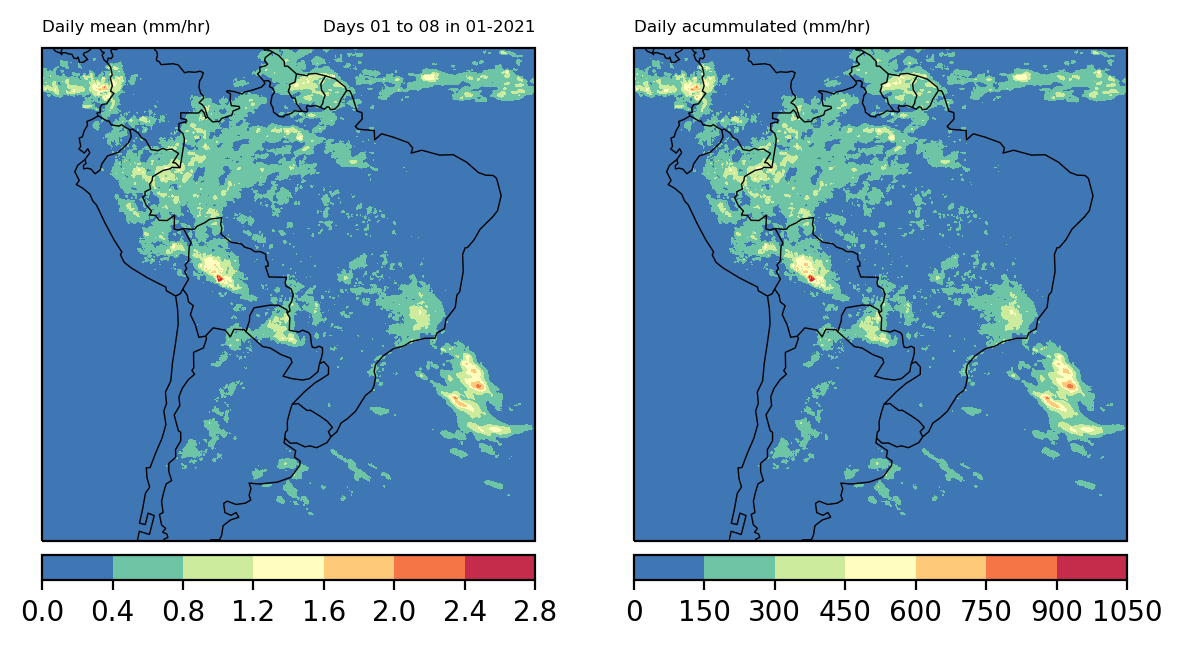

In [71]:
levels = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,9.5),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-31,-42,8])
a1 = ax1.contourf(lon2d,lat2d,salida_mean,cmap=cmap,levels=levels)
plt.colorbar(a1,orientation='horizontal',pad=0.01)
ax1.set_title('Daily mean (mm/hr)',loc='left',fontsize=6)
ax1.set_title(f'Days {day_s} to {day_e} in {month}-{year}',loc='right',fontsize=6)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-31,-42,8])
a1 = ax1.contourf(lon2d,lat2d,salida_acum,cmap=cmap,levels=levels)
plt.colorbar(a1,orientation='horizontal',pad=0.01)
ax1.set_title('Daily acummulated (mm/hr)',loc='left',fontsize=6)